# 💪 Challenges

## 1. What is the average number of Lego sets released per year?

Before quering for question let's review '**sets**' table, which provides required data to answer this question.

In [3]:
SELECT * 
FROM sets
LIMIT 6;

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
5,0014-1,Space Mini-Figures,1979,143,12


The '**sets**' table consists of Lego-sets detail: id of set, set name, year of release, theme id of set, number of parts used in each set. Now a query to find out average number of sets release per year :

In [4]:
WITH sets_year AS (SELECT year, COUNT(set_num) AS sets_per_year
                   FROM sets
                   GROUP BY year
                   ORDER BY year asc)

SELECT year,
       sets_per_year,
       ROUND(AVG(sets_per_year) OVER(),2) AS avg_sets_per_year
FROM sets_year
ORDER BY year;

,year,sets_per_year,avg_sets_per_year
0,1950,7,176.86
1,1953,4,176.86
2,1954,14,176.86
3,1955,28,176.86
4,1956,12,176.86
...,...,...,...
61,2013,593,176.86
62,2014,713,176.86
63,2015,665,176.86
64,2016,596,176.86


Above query with appropriate calculation gives an average number of sets relased per year for the span of 1950 to 2017, that is **approximately 177 sets/year.**
For better undersatnding of how the anual production of sets has varied over year, let's have a look at the following visualization.

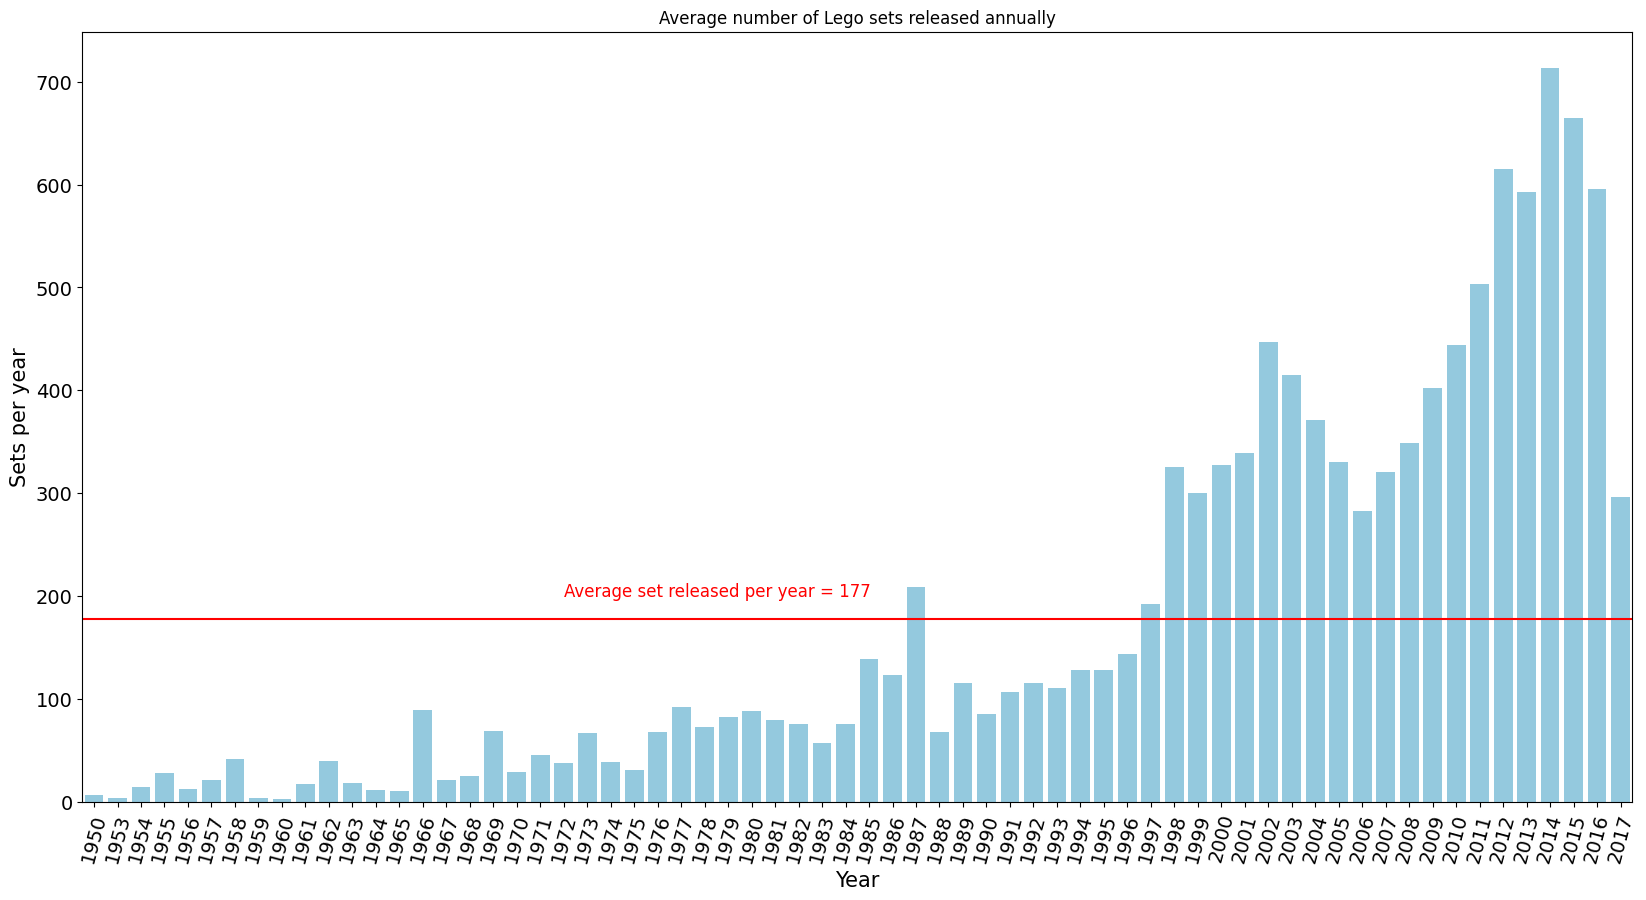

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize = (20, 10), dpi = 100)

ax = sns.barplot(data = sets_year, x = 'year', y = 'sets_per_year', color='skyblue')
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Sets per year',fontsize = 15)
ax.set_title('Average number of Lego sets released annually')
plt.xticks(rotation=75)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.axhline(y=177.86,color='red')
plt.text(20, 200, "Average set released per year = 177", size='large', color='red')

plt.show()

As we can see from the above chart, 1996 onwards the annual production was always higher than the average number of sets releases since the beginning of the company, except in the year 1987 crossing the average number of sets released(209 set).

Now, let's check next challenge.

## 2. What is the average number of Lego parts per year?

Each set consists of different number of lego parts and Lego release various sets each year. To find out average number of lego parts produced per year, the same table '**sets**' provides all required data. Below query answers 2nd question :

In [6]:
WITH total_parts AS (SELECT year,ROUND(SUM(num_parts)) AS parts_per_year
                     FROM sets
                     GROUP BY year)

SELECT year,parts_per_year, ROUND(AVG(parts_per_year) OVER()) AS avg_parts_per_year
FROM total_parts
ORDER BY year;

,year,parts_per_year,avg_parts_per_year
0,1950,71,28698
1,1953,66,28698
2,1954,173,28698
3,1955,1032,28698
4,1956,222,28698
...,...,...,...
61,2013,107537,28698
62,2014,121007,28698
63,2015,134110,28698
64,2016,150834,28698


Lego produces an average of **28698 parts/year**. But was is always like this? No, because here this average is taken over whole span from begining of the company to 2017, and therefore this large volume of lego part production seems to began in late 90's. This is better explained through visualization.

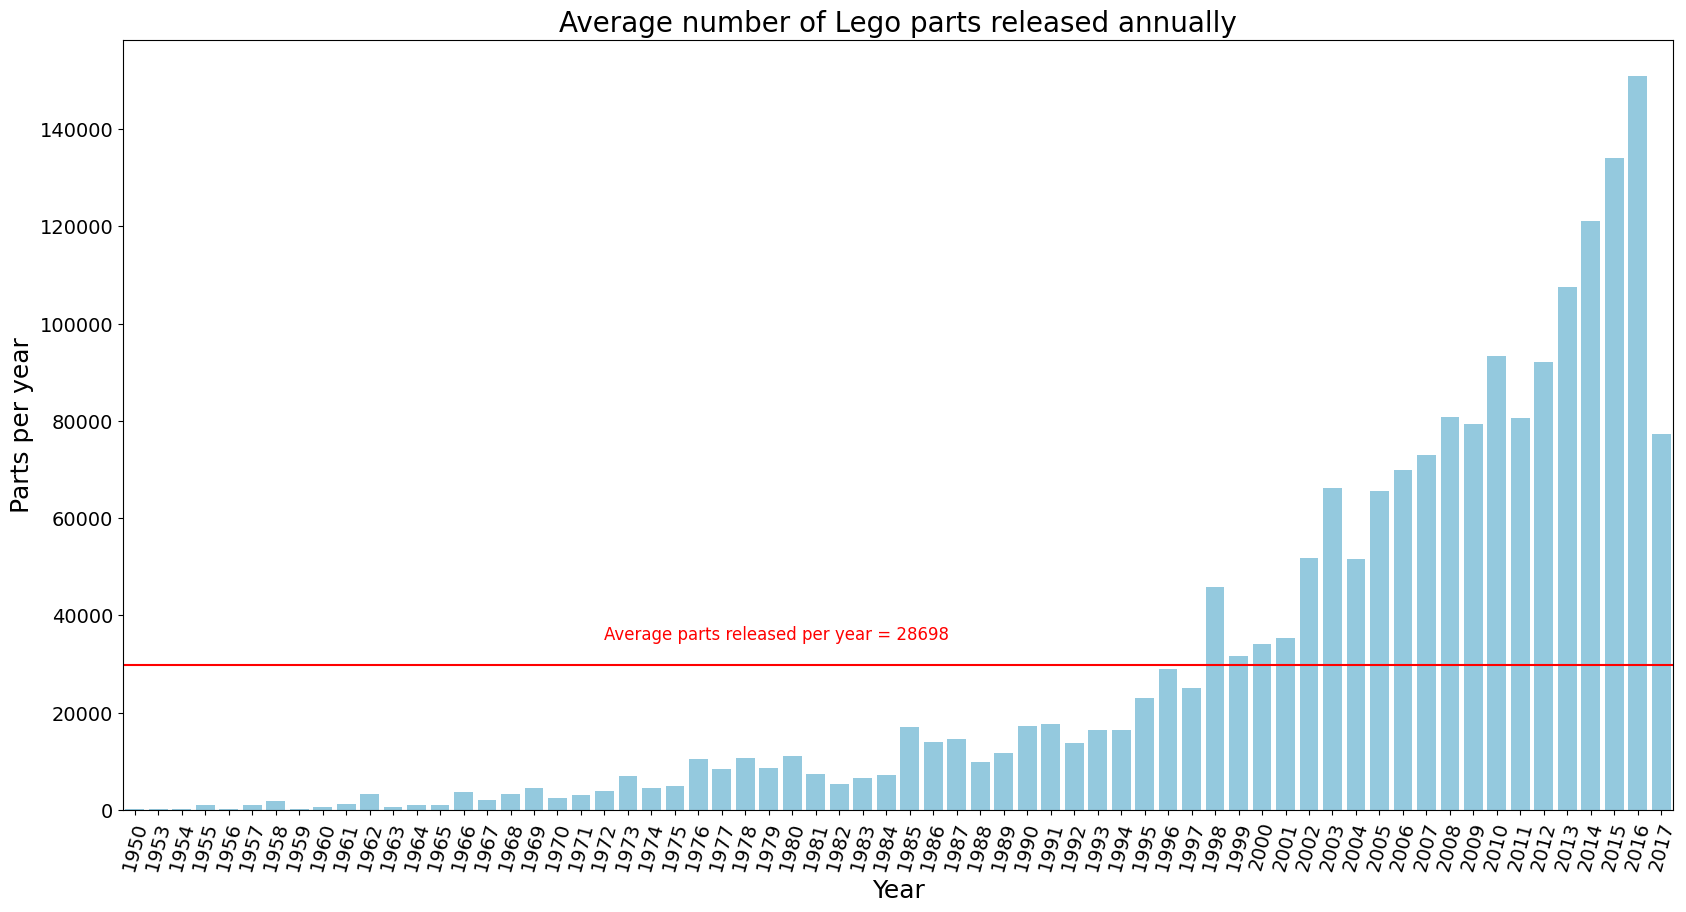

In [7]:
figure(figsize = (20, 10), dpi = 100)

ax = sns.barplot(data = avg_parts_year, x = 'year', y = 'parts_per_year', color='skyblue')
ax.set_xlabel('Year', fontsize = 18)
ax.set_ylabel('Parts per year',fontsize = 18)
ax.set_title('Average number of Lego parts released annually', fontsize=20)
plt.xticks(rotation=75)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.axhline(y=29698,color='red')
plt.text(20, 35000, "Average parts released per year = 28698", size='large', color='red')

plt.show()

Let's move to next challenge.

## 3. What are the 5 most popular colors used in Lego parts?

To answer this question let's first review '**inventory_parts**' table, which consists of information about all kinds of lego parts used to make different lego-sets.

In [8]:
SELECT *
FROM inventory_parts
LIMIT 6;

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,False
1,1,48395,7,1,False
2,1,mcsport6,25,1,False
3,1,paddle,0,1,False
4,3,11816pr0005,78,1,False
5,3,2343,47,1,False


Here one thing is missing about lego parts, that is the color of part(precisely the name of color). The coloumn 'color_id' of '**inventory_parts**' is a unique number for each color, and it is hard to know which color is of lego part from numbers! So, we will join table '**colors**' with '**inventory_parts**' to get name of color. '**colors**' table as shown below consists of color id, color name, rgb and color transparency.

In [9]:
SELECT *
FROM colors
LIMIT 6;

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,False
1,0,Black,05131D,False
2,1,Blue,0055BF,False
3,2,Green,237841,False
4,3,Dark Turquoise,008F9B,False
5,4,Red,C91A09,False


A query giving most popular colors used in lego parts :

In [15]:
WITH pop_color AS
(SELECT c.name AS color, COUNT(ip.part_num) AS total_parts
FROM inventory_parts AS ip
LEFT JOIN colors AS c
ON ip.color_id = c.id
GROUP BY color)

SELECT color,total_parts, ROUND(total_parts/SUM(total_parts) OVER()*100 ,2) AS percent_part
FROM pop_color
ORDER BY total_parts DESC
LIMIT 5;

,color,total_parts,percent_part
0,Black,115085,19.84
1,White,66536,11.47
2,Light Bluish Gray,55302,9.53
3,Red,50213,8.66
4,Dark Bluish Gray,43907,7.57


There are 131 different colors used to make lego parts. Among them **5 Most Popular colors** used in lego parts (in order)are :
1. **Black** 
2. **White** 
3. **Light Bluish Gray** 
4. **Red** 
5. **Dark Bluish Gray** 

As this question involves colors why not to visualize this result with colors!

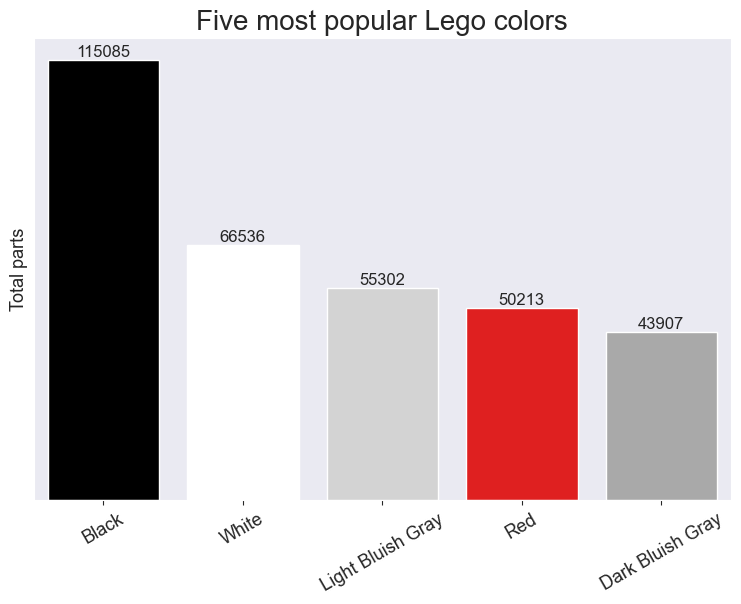

In [23]:
colors = ['black', 'white', 'lightgrey', 'red', 'darkgray']
sns.set_style("dark")

fig, ax = plt.subplots(figsize=(9, 6))
sns.barplot(data=pop_colors, x='color', y='total_parts', palette=colors, ax=ax)

# loop through the bars in the plot to add annotations on top of them
for bar in ax.patches:
    ax.annotate(f"{bar.get_height():.0f}",
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center',
                xytext=(0, 6), fontsize=12,
                textcoords='offset points')
 
# styling of the plot
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel='Total parts', fontsize=13)
ax.set_title("Five most popular Lego colors", fontdict= {'fontsize':20, 'fontweight':'normal'})
ax.xaxis.tick_bottom()
plt.yticks([])
plt.xticks(rotation=30, fontsize=13)


plt.show()

Let's see top 5 colors accounts for what proportion of the total lego parts.

In [12]:
import pandas as pd

pop_colors['total_parts'].sum()


580069

There are in total **580069 lego parts**.

In [13]:
sum_top5 = pop_colors.loc[0:4,'percent_part'].sum()
sum_top5

57.07

**Top 5 colors**; black, white, light bluish gray, red and dark bluish gray are present in **57% of lego parts** released till 2017.

## 4. What proportion of Lego parts are transparent?

There is coloumn named 'is_trans' in '**colors**' table, which tells wether color of lego part is transparent or opeque. Once again '**inventory_parts**' table joined with '**colors**' table with appropriate query answer this question.

In [14]:
WITH trans_color AS
(SELECT (CASE WHEN c.is_trans=True THEN 'Transparent' ELSE 'Opeque' END) AS color_type,
        COUNT(ip.part_num) AS total_parts
FROM inventory_parts AS ip
LEFT JOIN colors AS c
ON ip.color_id = c.id
GROUP BY c.is_trans)

SELECT color_type,
       total_parts,
       ROUND( (total_parts/ SUM(total_parts) OVER() * 100) ,2) AS percentage
FROM trans_color;

,color_type,total_parts,percentage
0,Opeque,543751,93.74
1,Transparent,36318,6.26


Above result shows that **6.26%** lego parts are **transparent**. In proportion it seems less but it still accounts for **36318 parts**.

## 5. What are the 5 rarest lego bricks?

There are various way of looking at this question and answer it.
1. First we will find the groups of bricks that have been **released in the lowest amount**. Three tables needed to find out rarest bricks : '**part_categories**', '**parts**', and '**inventory_parts**'

In [30]:
SELECT PC.name, sum(IP.quantity) as total_usage
FROM part_categories AS PC
JOIN parts AS P
ON PC.id = P.part_cat_id
JOIN inventory_parts AS IP
ON P.part_num = IP.part_num
WHERE PC.name LIKE '%rick%'
GROUP BY PC.name
ORDER BY total_usage
LIMIT 5;

,name,total_usage
0,Bricks Printed,4580
1,Bricks Wedged,9209
2,Technic Bricks,36173
3,Bricks Curved,38560
4,Bricks Round and Cones,48525


Visual understanding for above result.

In [33]:
import plotly.express as px

fig = px.bar(rare_bricks1,
                 x="name",
                 y="total_usage",
                 title="<b>The 5 rarest types of Lego Bricks</b>",
                 labels={"name": "Type of Brick", "total_usage": "Amount of Parts"})
           	  
fig.show()

2. Other way of looking at rarest bricks is to identify the bricks that are **least commonly utilized in the production of Lego sets**.

In [36]:
WITH five_rarest_parts AS
(
SELECT 
    p.part_num AS part_id,
    COUNT(*)
FROM parts AS p
FULL JOIN inventory_parts AS ip
    USING(part_num)
WHERE p.name ILIKE 'brick%'
    OR p.name ILIKE '%brick%'
    OR p.name ILIKE '%brick'
GROUP BY p.part_num
ORDER BY COUNT
LIMIT 5)

SELECT 
    part_num AS id_part,
    name AS brick_name
FROM parts p
INNER JOIN five_rarest_parts rp
    ON p.part_num = rp.part_id;

,id_part,brick_name
0,30603pb04,"Brick Curved 2 x 2 No Studs, Sloped with 3 Sid..."
1,25123,"DUPLO BRICK 2X2X2 ""NO 42"""
2,30601,"Brick, Modified 2 x 2 No Studs, Sloped with An..."
3,3001b,"Brick 2 x 4 without Cross Supports, with Hole ..."
4,5306bc017,"Electric Wire with Brick 2 x 2 x 2/3 Pair, 17 ..."
